In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from enum import Enum
import numpy as np
import random

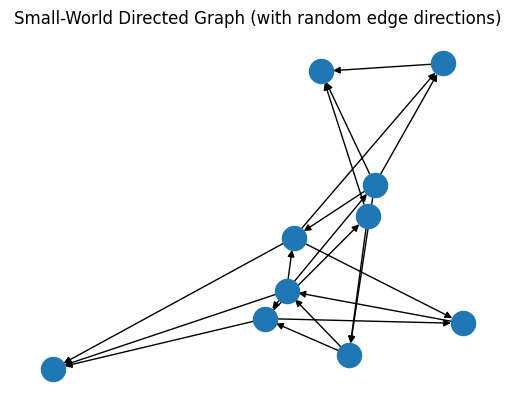

In [25]:
# Створення small-world графа
undirected_graph = nx.watts_strogatz_graph(n=10, k=4, p=0.3, seed=1)

graph = nx.DiGraph()
graph.add_nodes_from(undirected_graph.nodes)

for u, v in undirected_graph.edges:
    if random.random() < 0.5:
        graph.add_edge(u, v)
    else:
        graph.add_edge(v, u)

graph.remove_edges_from(nx.selfloop_edges(graph))


# Побудова
fig, ax = plt.subplots()
position = nx.spring_layout(graph, seed=5)

nx.draw_networkx_nodes(graph, position, ax=ax)
nx.draw_networkx_edges(graph, position, ax=ax, arrows=True)
# nx.draw_networkx_labels(directed_graph, position, ax=ax, font_weight='bold')
plt.axis("off")  # <-- вимикає рамку графіка
plt.title("Small-World Directed Graph (with random edge directions)")
plt.show()

In [26]:
class State(Enum):
    SOURCE = 0
    SUSCEPTIBLE = 1
    INFECTED = 2
    RECOVERED = 3
    
STATE2COLOR = {
    State.SOURCE: "red",
    State.SUSCEPTIBLE: "lightsteelblue",
    State.INFECTED: "darkorange",
    State.RECOVERED: "green"
}

In [27]:
np.random.seed(1)

source_node = 3

for node in graph.nodes:   

    if (node == 3) or (node == 75) or (node == 128) or (node == 90) or (node == 50) or (node == 34):
        graph.nodes[node]["state"] = State.SOURCE
        graph.nodes[node]["resistance"] = 0
    else:
        graph.nodes[node]["state"] = State.SUSCEPTIBLE
        graph.nodes[node]["resistance"] = np.random.random()

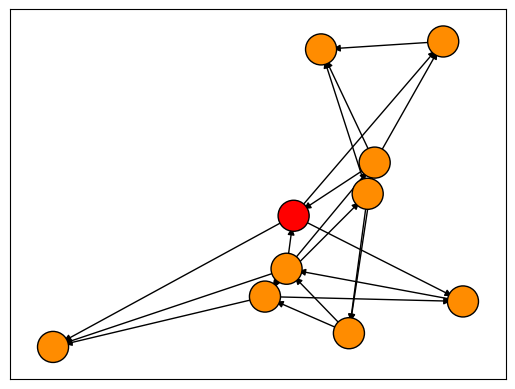

In [33]:
fig, ax = plt.subplots()

position = nx.spring_layout(graph, seed=5)

node_colors = [STATE2COLOR[graph.nodes[node]["state"]] for node in graph.nodes]

nx.draw_networkx_nodes(graph, position, ax=ax, node_color=node_colors, edgecolors="black", node_size=500)
# nx.draw_networkx_labels(graph, position, ax=ax, font_weight='bold')
nx.draw_networkx_edges(graph, position, ax=ax) #, edgelist=graph.edges()

plt.show()

In [30]:
def change_states(graph, graph_copy, node):
    node_state = graph.nodes[node]["state"]

    if node_state == State.SOURCE:
        return
    
    elif node_state == State.SUSCEPTIBLE:

        predecessor_states = {graph_copy.nodes[pre]["state"] for pre in set(graph.predecessors(node))}

        if {State.SOURCE, State.INFECTED} & predecessor_states:
            if graph.nodes[node]["resistance"] < np.random.random():
                graph_copy.nodes[node]["state"] = State.INFECTED

    elif node_state == State.INFECTED:
        if graph.nodes[node]["resistance"] > np.random.random():
            graph_copy.nodes[node]["state"] = State.RECOVERED
        else:
            graph.nodes[node]["resistance"] = max(graph.nodes[node]["resistance"]/2, graph.nodes[node]["resistance"]-np.random.random())
        
    elif node_state == State.RECOVERED:
        if graph.nodes[node]["resistance"] > np.random.random():
            graph.nodes[node]["resistance"] = min(graph.nodes[node]["resistance"]+np.random.random(), 2*graph.nodes[node]["resistance"], 1)
        else: 
            graph_copy.nodes[node]["state"] = State.SUSCEPTIBLE

In [31]:
def visualize_graph(gr):
    fig, ax = plt.subplots()

    position = nx.spring_layout(gr, seed=5)

    node_colors = [STATE2COLOR[gr.nodes[node]["state"]] for node in gr.nodes]

    nx.draw_networkx_nodes(gr, position, ax=ax, node_color=node_colors, edgecolors="black", node_size=500)
    nx.draw_networkx_labels(gr, position, ax=ax, font_weight='bold')
    nx.draw_networkx_edges(gr, position, ax=ax) #, edgelist=graph.edges()

    resistance_labels = {node: f"{gr.nodes[node]['resistance']:.7f}" for node in gr.nodes}
    label_offset = 0.12  
    pos_labels = {node: (x, y + label_offset) for node, (x, y) in position.items()} 
    
    nx.draw_networkx_labels(gr, pos_labels, ax=ax, labels=resistance_labels, font_size=10, font_color='#595959', font_weight='bold')
    
    plt.show()

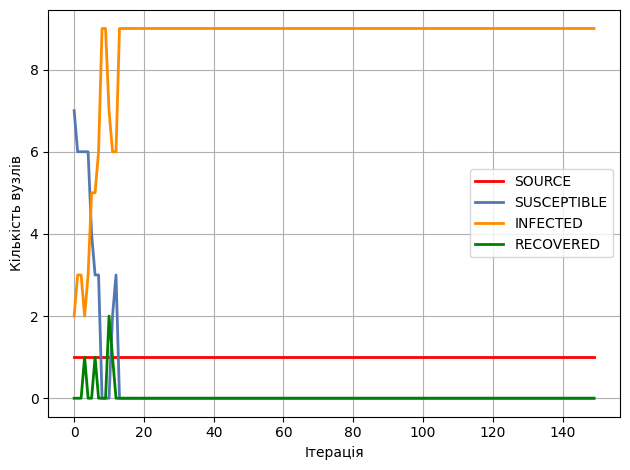

In [32]:
state_counts = {
    State.SOURCE: [],
    State.SUSCEPTIBLE: [],
    State.INFECTED: [],
    State.RECOVERED: []
}

for step in range(150):
    graph_copy = graph.copy()
    for node in graph.nodes:
        change_states(graph, graph_copy, node)
    for node in graph.nodes:
        graph.nodes[node]["state"] = graph_copy.nodes[node]["state"]

    # підрахунок кількості вузлів у кожному стані
    all_states = [graph.nodes[n]["state"] for n in graph.nodes]
    for state in State:
        state_counts[state].append(all_states.count(state))

    # if step==2:
        # visualize_graph(graph)


STATE2COLOR[State.SUSCEPTIBLE] = "#5478b3"

# ==== 5. Побудова графіка ====
# plt.figure(figsize=(10, 6))
for state, counts in state_counts.items():
    plt.plot(counts, label=state.name, color=STATE2COLOR[state], linewidth=2)

plt.xlabel("Ітерація")
plt.ylabel("Кількість вузлів")
# plt.title("Dynamics of States Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()